#LetsGrowMore DataScience Internship

#Name: Pooja Pathak

#Title: Prediction Using Decision Tree Algorithm

#Batch: March

#Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

#Reading the dataset

In [2]:
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Looking the dataset

In [3]:
df.shape

(150, 6)

In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

#Data Pre-processing

In [7]:
df = df.drop(['Id'], axis =1)
df = df.replace(to_replace = {"Species":{"Iris-versicolor":0, "Iris-versicolor":1, "Iris-virginica":2}})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df["Species"] = df["Species"].astype("category").cat.codes

#Explantory data analysis


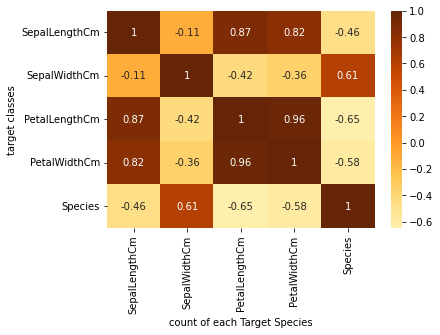

In [9]:
sns.heatmap(df.corr(), annot = True, cmap = 'YlOrBr', center = 0)
plt.ylabel('target classes')
plt.xlabel('count of each Target Species')
plt.show()

#Model Building

In [10]:
x = df.drop(['Species'], axis = 1)
y = df['Species']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier

#Create an instance and fit the model
decmodel = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

#Fitting the train and test data
decmodel.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
y_pred = decmodel.predict(x_test)
predicted = y_pred
actual = y_test

from sklearn.metrics import accuracy_score
score_lr = accuracy_score(y_test, y_pred)
print("Accucac \t", score_lr)

from sklearn.metrics import confusion_matrix
results = confusion_matrix(actual, predicted)
print('confusion matrix \n', results)

Accucac 	 0.9111111111111111
confusion matrix 
 [[14  4  0]
 [ 0 11  0]
 [ 0  0 16]]


In [14]:
feature_names = df.columns[:4]
target_names = df['Species'].unique().tolist()
arget_names = ['0','1','2']
feature_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [15]:
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.78      0.88        18
           1       0.73      1.00      0.85        11
           2       1.00      1.00      1.00        16

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



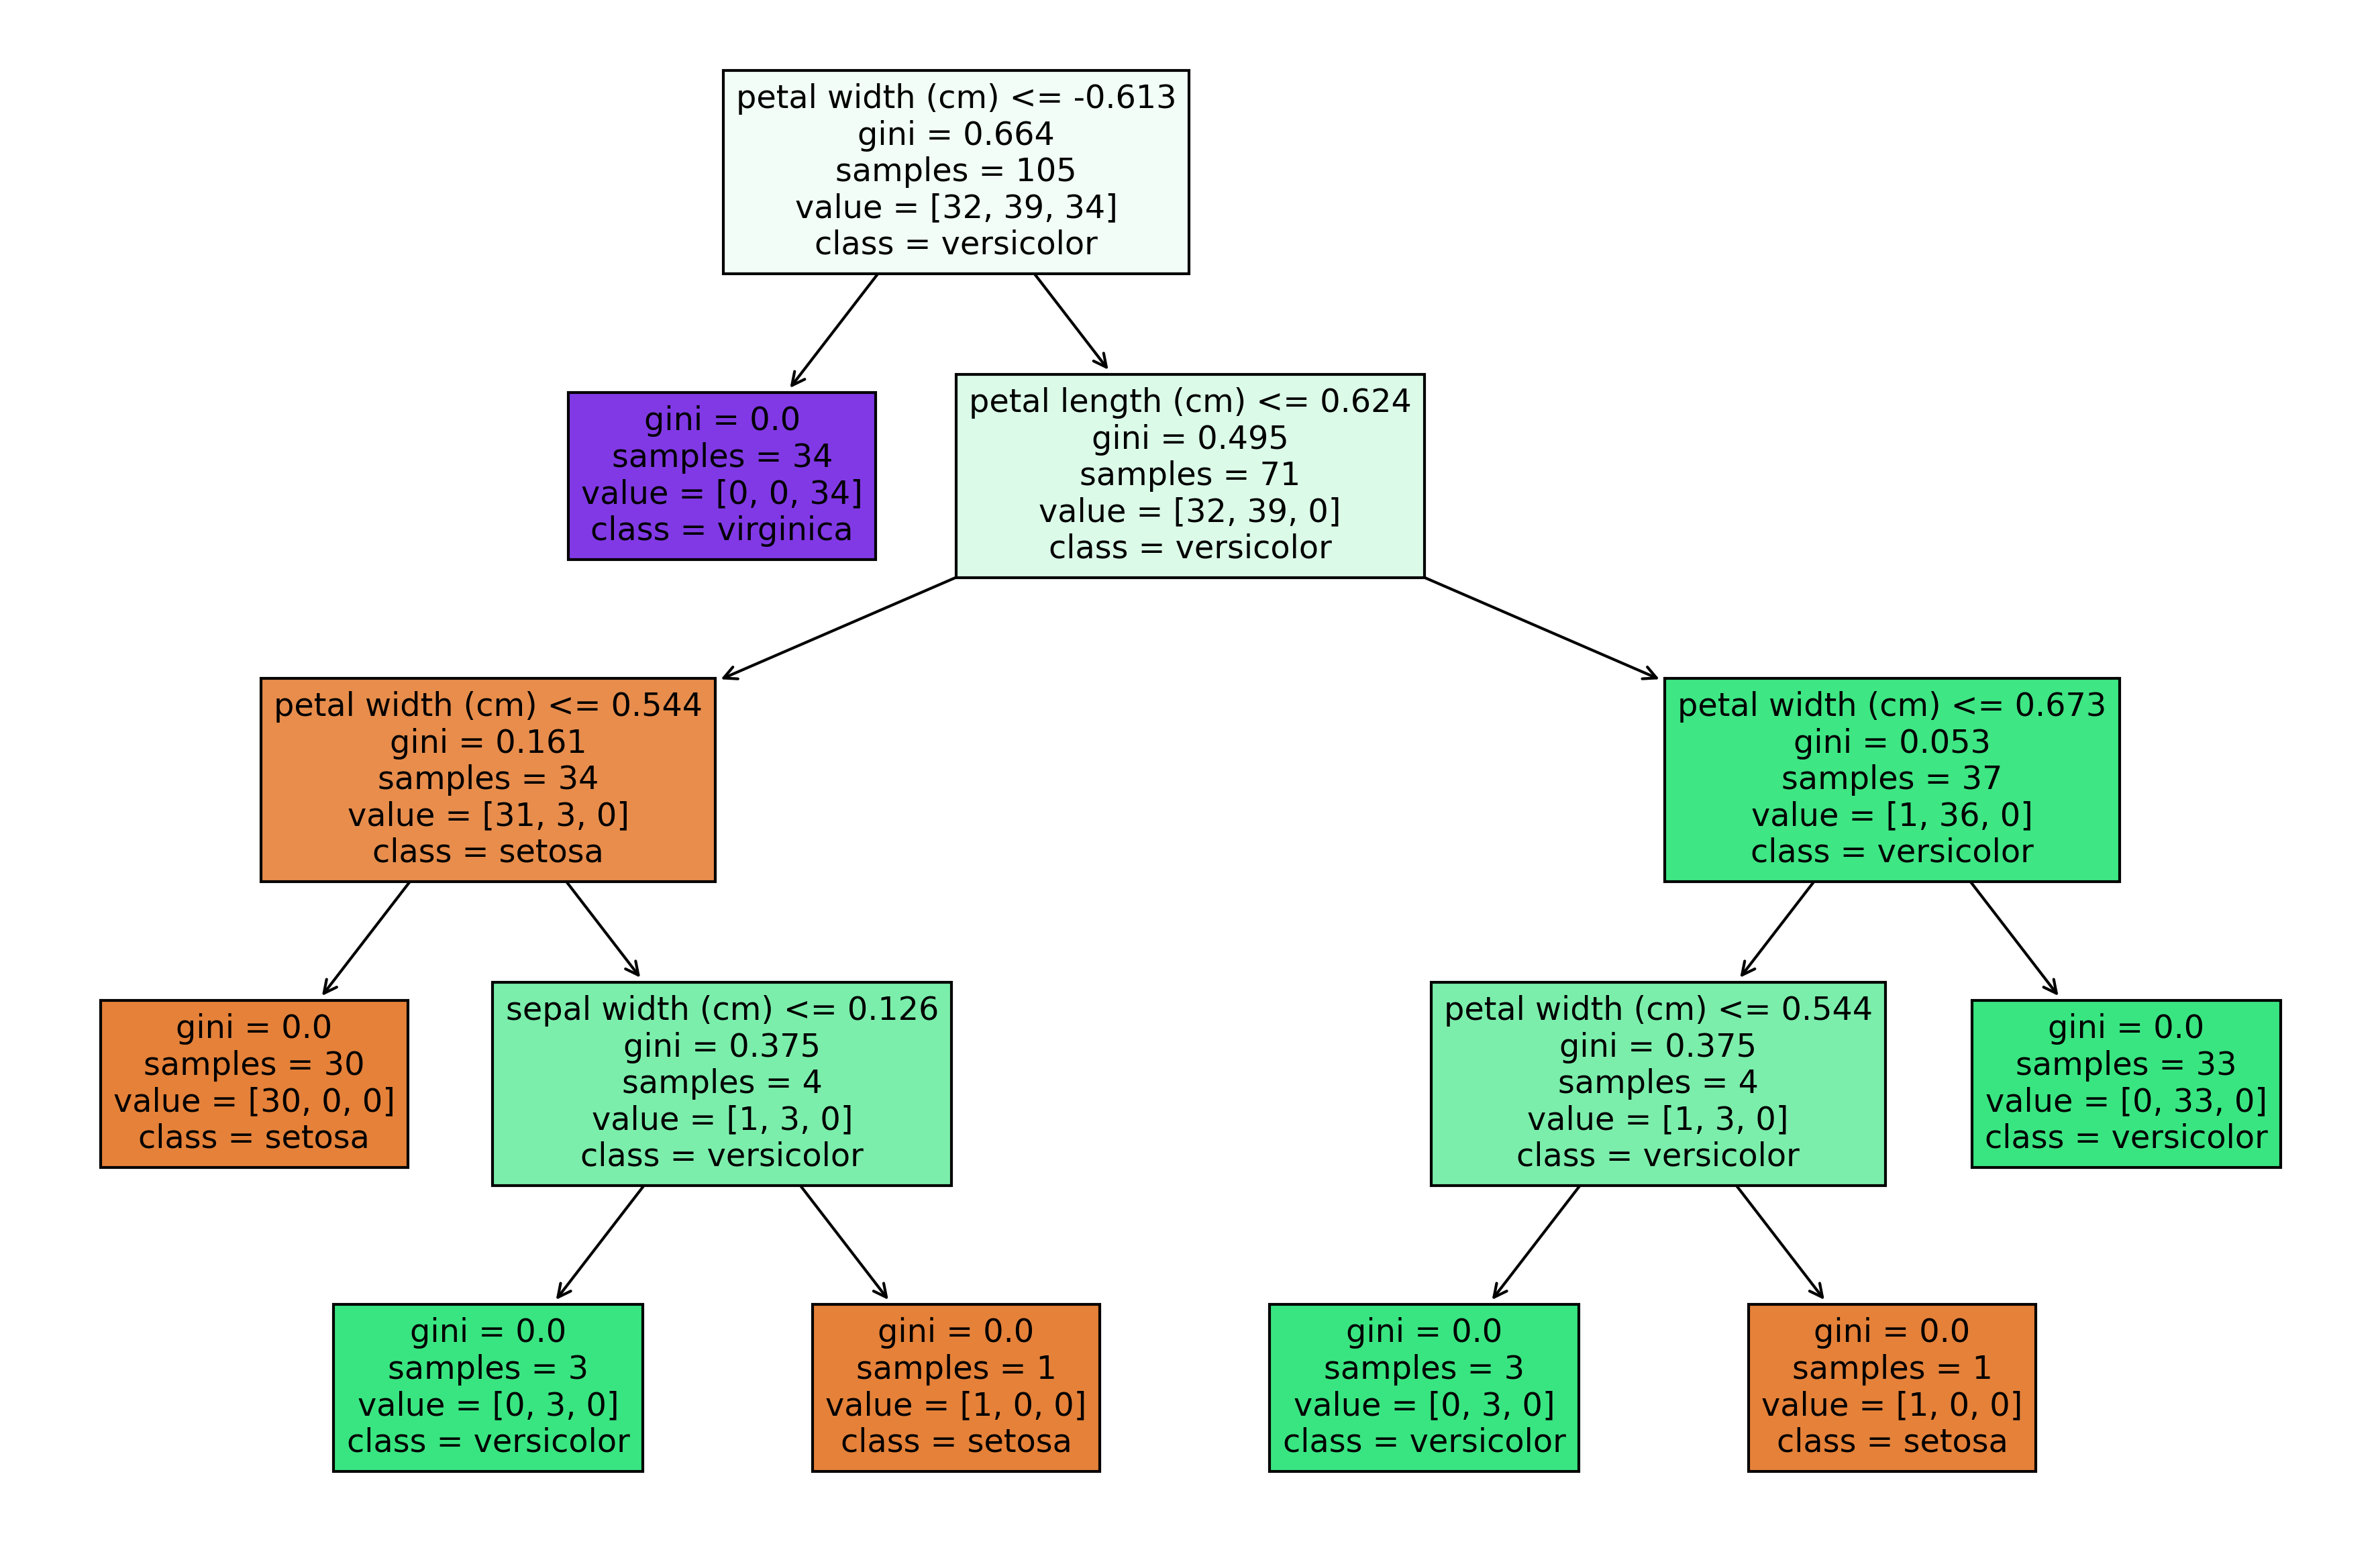

In [16]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(decmodel,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

#Conclusion


The developed model properly classified both of the classes of target variable. Even for the minority class, the f1 score was 0.91. It means that this model has learned to predict the employee Attrition very well.